# Intro

Probabilities can define events and stuff in the past, and can do the same drill with quantitative models for the future. But as we leave the shadows of closed and known data of the past and present we leave the realm of descriptive probabilities and gotta introduce the uncertainty of the future via captureing it trough random variables in order to make the maths work. 

Therefore, the attention is redirected towards the random variables, here and now! Rejoyce! ( is this a word right? )


## Definition of a Random Variable 

The axioms of probability is being generally enough to describe many forms of randomness (e.g. coin toss, draw of a well shuffled deck of cards and so on..).

Howewer directly applying probability can be difficult due to it is being defined trough events, which are absctract concepts by nature.  Randum variables limit attention to random phenomena which can be described using numeric values.

This covers a wide range of applications relevant to risk management (e.g. describeing asset returns, or measureing defaults, or quantifying the uncertainty in parameter estimates). The restriction that random variables are only defined on numeric values simplifies the mathematical tools used to characterise behaviour. 

**A random var is a function of $\omega$ -- i.e. being an event within sample space $\Omega$ -- that returns the number $x$. It is conventionan to express a random variable usung upper case letters like $X$, $Y$, $Z$, $A$, $B$ and so on, and to express realisation of a random variable ain lower-case letters like $x$, $a$, $b$. The dictinction is fundamental, a random variable is a function (denoted by upper case), and the realisation is a number (lower case).** 

This can be expressed as:$$ x = X( \omega )$$ Read as realised outcome of x expressing numerical value is the result of event omega within function X as an input where function X captures the randomness of the outcome given exent omega.

For example, let function $X$ be the random variable defined by the roll of a fair dice. Then we can denote $x$ as the result of a single roll (i.e. one event). The probabiltiy that the random varibale $x$ being realised with the numeric value of $5$ for $\omega$ input can be expressed as:$$Pr(X = x) \text{   when   } x = 5$$

Univariate random variables are frequently distinguished based on the range of values produced. The two classes of random vaeriables are discrete and continous. A discrete random variable os one that produces distinct values, like the dice rolls. Continous probs are usually expressed ranges like expected returns and so on cause the output set is "uncountable". This is not the correct mathsy definition but IDC at the moment.

## Discrete Random Variables

A discrete random variable assigns a probability to a set of distinct values. This set can be either finite, or contain a countably infinite set of values. The leading example of a countably infinite set is the collection of all integers, like for example how many ppl can be born if we ignore resourve and spacial boundaries. My intuition is that the differenciating factor is that for integers, infinity must be counted once persay, while for rational numbers, we count once for integers, than we count once for integers over / 2, than for /3, and so on.. So basically we have to count infinity infinitely many times, since there's always a higher denominator for new fractions, consequently the process isn't discrete, its countinous.

One important example of a discrete random variable is a **Bernoulli random variable**, which are frequently encountered when measuring binary random events, like the defaults.

Because the values of random variables are always numerival, they can be described precisely using mathematical functions. 

## Probability Mass Function (PMF)

PMF returns the probability of outputs of a given function, where in case of visualisation the X axis refers for the (meaningful) range of the set of values the given probabilistic mass function can return, while Y axis is for the probabilities themselves. 

1. The value returned from PMF must be non negative
2. The sum across all values in the support of a random variable must be one

For example, if a random variable $ X $ outputs Bernoulli distributed values such that $ X(\omega) = x \in \{0,1\} $, with parameter $ p \in [0,1] $), then the PMF of $ X $ is:
$$
f_X(x) = p^{x} (1-p)^{1-x}
$$

Note, that $f_x(0) = p^0 * (1-p)^1 = 1 - p$, and $f_x(1) = p^1 * (1 - p) ^ 0 = p$ since usually $a^0 = 1$

Formally: $$
f_X(x) = \begin{cases}
1 - p & \text{if } x = 0 \\
p & \text{if } x = 1
\end{cases}
$$

Outcome x = 0's probability P(X=0) with p = 0 is 1.000
Outcome x = 1's probability P(X=1) with p = 0 is 0.000
Outcome x = 0's probability P(X=0) with p = 0.33 is 0.670
Outcome x = 1's probability P(X=1) with p = 0.33 is 0.330
Outcome x = 0's probability P(X=0) with p = 0.75 is 0.250
Outcome x = 1's probability P(X=1) with p = 0.75 is 0.750


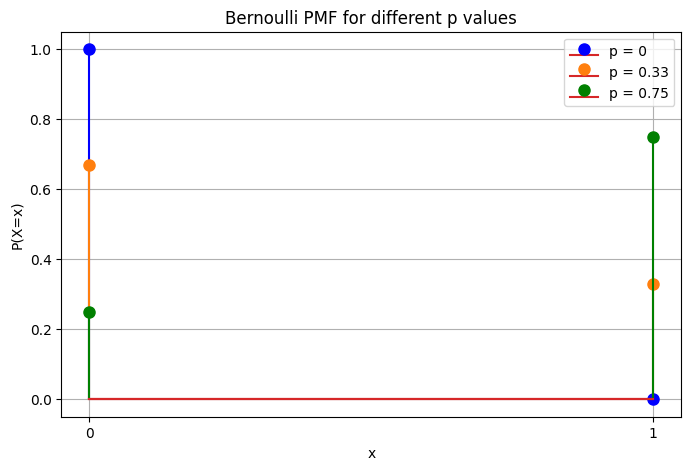

In [33]:
# ---- Libraries utulized ---------------------------------
import numpy as np                       # For arrays            
import matplotlib.pyplot as plt          # For plotting
# --------------------------------------------------------

# ---- Bernoulli function definition ----
def bernoulli_pmf(x, p):
    return p**x * (1-p)**(1-x)
# ---------------------------------------



x_values = np.array([0, 1])             # np arrays
p_values = [0, 0.33, 0.75]              # For the Bernoulli function, inputs
colors = ['b', 'C1', 'g']               # Colour definition for different p values

# ---- Let's loop shall we? ----------------
for p in p_values:
    for x in x_values:
        probability = bernoulli_pmf(x, p)  # function call with x and p
        print(f"Outcome x = {x}'s probability P(X={x}) with p = {p} is {probability:.3f}")


plt.figure(figsize=(8, 5))
for p, color in zip(p_values, colors):
    pmf_values = bernoulli_pmf(x_values, p)
    markerline, stemlines, baseline = plt.stem(x_values, pmf_values, label=f'p = {p}', linefmt=color, markerfmt=f'{color}o')
    plt.setp(markerline, markersize=8)
    plt.setp(stemlines, linewidth=1.5, color=color)

plt.xticks(x_values)
plt.xlabel('x')
plt.ylabel('P(X=x)')
plt.title('Bernoulli PMF for different p values')
plt.legend()
plt.grid(True)
plt.show()

The PMF is denoted by $f_x (x)$ to differentiate to the random variable $X$ underlying the mass function from the realization of the random variable, which is $x$, i think I messed that up above... Anywaay. 

The counterpart of PMF is the CDF, which is the cummulative distribution function, which measures the total probability of values less than, or equal to $x$. In case of a Bernoulli dist function, it is a simple so called "step function", which steps the quite finite cases of lower bound 0, the values, and the upper bound, 1. $$F_X(x) = P(X \leq x) = \begin{cases}
0 & \text{if } x < 0 \\
1 - p & \text{if } 0 \leq x < 1 \\
1 & \text{if } x \geq 1
\end{cases}$$


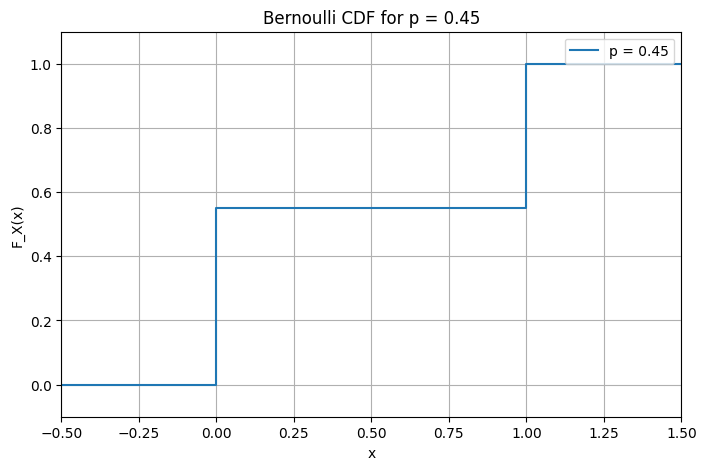

In [34]:
# Bernoulli parameter
p = 0.45

# Define x values around the steps of the CDF
x_vals = [-0.5, 0, 0, 1, 1, 1.5]
# Corresponding CDF values
cdf_vals = [0,    
            0,     
            1 - p, 
            1 - p,
            1,
            1]

plt.figure(figsize=(8, 5))
plt.step(x_vals, cdf_vals, where='post', label=f'p = {p}')
plt.xlabel('x')
plt.ylabel('F_X(x)')
plt.title(f'Bernoulli CDF for p = {p}')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
plt.show()


Note that the dist function is denoted by $f(x)$, while the CDF is $F(x)$

CDF can be always expressed from PMF as the sum of PMG for all values in the supprt function thart are less than or equal to $x$.$$
F_X(x) = \sum_{\substack{t \in R(X), t \leq x}} f_X(t)$$

$$
\text{Where:}
\begin{cases}
F_X(x) = P(X \leq x) & \text{is the CDF of random variable } X, \\
f_X(t) = P(X = t) & \text{is the PMF}, \\
R_X & \text{is the support (the set of possible values) of } X, \\
\text{The sum is taken over all } t \in R_X \text{ with } t \leq x.
\end{cases}
$$

In [35]:
# Bernoulli parameter
p = 0.45

# Support of the discrete random variable (R_x)
x_values = np.array([0, 1])

# PMF values at each support point: f_X(t)
pmf_values = [bernoulli_pmf(x, p) for x in x_values]

def CDF(x, support, pmf):
    """
    Computes the CDF F_X(x) by summing PMF values for supporting points <= x.
    
    :param x: Value to evaluate CDF at
    :param support: Array or list of support values
    :param pmf: Array or list of PMF values corresponding to support
    :return: CDF value F_X(x)
    """
    sum_pmf = 0.0
    for t_val, prob in zip(support, pmf):
        if t_val <= x:
            sum_pmf += prob
    return sum_pmf

# Test CDF function at different x values
test_x_values = [round(0.1 * n, 2) for n in range(-3,13)]
for X in test_x_values:
    result = CDF(X, x_values, pmf_values)
    print(f"For x = {X}, CDF is: {result:.2f}") 
# Prints 0.55 for x = 0 to 0.99999... as p^x * (1-p)^1-x -> 0.45^0 is 1, 
# which gives 1 * (1-0.45)^(1-0) which is 0.55
# It's basically P(event)'s complementer

For x = -0.3, CDF is: 0.00
For x = -0.2, CDF is: 0.00
For x = -0.1, CDF is: 0.00
For x = 0.0, CDF is: 0.55
For x = 0.1, CDF is: 0.55
For x = 0.2, CDF is: 0.55
For x = 0.3, CDF is: 0.55
For x = 0.4, CDF is: 0.55
For x = 0.5, CDF is: 0.55
For x = 0.6, CDF is: 0.55
For x = 0.7, CDF is: 0.55
For x = 0.8, CDF is: 0.55
For x = 0.9, CDF is: 0.55
For x = 1.0, CDF is: 1.00
For x = 1.1, CDF is: 1.00
For x = 1.2, CDF is: 1.00


## Expectations

The expected valuze of a random variable is denoted $E[X]$ and is defined as:$$E[X] = \sum_{\substack{x \in R(X)}}x * Pr( X = x )
$$Where $R(X)$ is the range of values of the random variable $X$ can realise, think of it as a python *range(X)* function for $X$ iterated over, as if you think trough sumnation is a for loop at it's core, and a while if it got an "upper bound" but here we iterate a *list* variable for all of it's elements.

**So an expectation is simply the average of the values in the support function of $X$ weighted by the probability that value $x$ is observed.**
For example, when $X$ is a Bernoulli random variable where the prob of observeing 1 is $p$:$$E[X] = p^1 * (1-p)^0 = p * 1 = p$$And for 0:
$$E[X] = p^0 * (1-p)^1 = 1 * (1-p) = 1-p$$

We can expand this for functions's returned values ( realisations -> $x$; wrapped in their probabilistic function ) opposing to just passing an outright value $X$. So:$$ E[X] = \sum_{\substack{x \in R(X)}}f(x) * Pr( X = x )$$Note that the difference is just wrapping $x$ with $f()$, and together $f(x)$ is a function of the realization of value $x$.

For example when $X$ is a Bernoulli random variable, then the expected value of the exponentioal of $X$ is:$$
E[\exp(X)] = (1-p) \cdot e^{0} + p \cdot e^{1} = (1-p) \cdot 1 + p \cdot e = 1 - p + p e
$$ 

**Call Vailla Option Yap**
Consider a VANILLA Call Option where we denote the price at expiration via $S$ as "settlement price". Let $c()$ be the payoff function denote for a call option, and $K$ being the contractual strike price.
The payoff is calculated as: $c(S) = MAX(S - K; 0)$ If $S$ outpaces $K$ at the theta mark on the curve the contract fixes against, the holder (long) of the derivative contract is getting a cashflow of $S - K$ from the seller (short) as per the contractual agreement. Regarding priceing or valueing an option as such requires computational valuation of the inherent uncertainty arisieing from the fact, that the payoff in the future is derived from the relation of $S$ and $K$, where $K$ is fixed over theta, while $S$ has an element of uncerteiny usually modelled trough the lense of Vega and Theta.

Suppose the value of the underlying asset's price $S$ can take on 1 of 3 values, 20 (p=0.2), 50 (p=0.5) and 100 (p=0.3).

In [36]:
S: list = [20, 50, 100]    # Future price of the underlyer
P: list = [0.2, 0.5, 0.3]  # Probabilities
K: int = 40                # Strike Price
ccy: str = "EUR"           # Unit definition for ccy to give meaning to the raw number

def payoff(S, K):    # f()
    payoff = []
    for s in S:
        payoff.append(max(s - K, 0))
    return payoff

S_payoff: list = payoff(S, K)
print(S_payoff)

# ----- E[X] = sum ( f(x) * Pr(X = x) ); where x is element of range(X) -----
# range(X) is list "S_payoff" in this instance, so 0, 0, 50
def E_X(X, probability):                      # Payoff and probability lists
    """Function takes X values, and the corresponding probabilities. 
    Regarding indexation order they must match.
    Outputs E[X] given X and p(X).
    """
    E_X: float = 0.00
    for index in range(len(X)):               # Sumnation is a for loop actually
        E_X += X[index] * probability[index]  # f(x) * Pr(X = x), here f() already computed by "S_payoff = payoff(S, K)"
    return E_X                                # E[X] on the other end of the equation



E_X_value = E_X(S_payoff, P)                  # E[X] = E_X function's result given X = S_payoff (list) and P (list)

print(f"E[option payout] = {E_X_value} {ccy}")
# Consequently for this contract the maximum I'm willing to pay for it is E[X]
# Given that I'm confident that my model accurately reflects reality. 

[0, 10, 60]
E[option payout] = 23.0 EUR


## Properities of the Expectation Operator - E[]

The expectation operator $E[]$ takes a random realised variable with is usually denoted by $X$ or other capital letters, alternatively a function like $f(x)$, and $E[]$ marks the computation of the average of X's possible values weighted by the corresponding probabilities ($p$). $E[]$ has a particularly useful properity that it is a linear operator. For example if a,b,c are constants, and X and Y are random variables, then $$E[a + bX + cY] = a + bE[X] + cE[Y]$$

An immediate implication of linearity is that the expectation of a constant $a$ is the constant: $a = E[a]$. Related implication is that $E[E[x]] = E[X]$.

**While linearity is a useful property, note that the expectation operator does not pass through nonlinear functions of $X$. For example, if $f(X) = 1/X$, then**
$$
\mathbb{E}\left[\frac{1}{X}\right] \neq \frac{1}{\mathbb{E}[X]}
$$
**and in general**
$$
\mathbb{E}[g(X)] \neq g(\mathbb{E}[X])
$$**except if $g()$ is a linear function**

## (The Four Central) Moments: *Mean*, *Variance*, *Skewness*, *Kurtosis*

Moments are a set of descriptive measures that characterize important features of random variables. Specifically, a moment is the expected value of a function of a random variable.

### The First Moment - Expected value of $X$ -> $\mu$

So as we discussed above, $X$ = $E[X]$, and for momentdum discussion we leverage smallcap "mu", which is $\mu$ to denote it basically. So:$$\mu_x = E[X]$$

The second and higher moment all share the same form, and only differ in one parameter. These moments are defined as:$$\mu_r = E[(X - E[X])^r]$$ Where $r$ denotes the order of the moment (2 for the second, 3 for third, and so on... Formally these are known as *central moments* since they all center around the first moment, $E[X]$. There is also a second class of moments called *non-central moments*. Those moments are not centered around the mean. Those are less useful for describing rendom variables, so for now I'll leave them to be.

**The first four moments are commonly used to describe random variable's behaviour. They are the *mean, the variance, the skew, and the kurtosis*.**

### The Mean - $\mu$

The mean happens to be the first moment:$$\mu = E[X]$$Mean is the average of $X$, in variability lingo also referred as the location of the distribution if you happen to be a man of culture and feeling fancy.

### The Variance - $\sigma^2$

The variance is the second moment, and usually denoted by being squared:$$\sigma^2 = E[(X - E[X])^2 = E[(X - \mu)^2]$$
It is the measure of dispersion of the random process $f(X)$, alternatively the average distance of $x$ from $\mu$. Higher the variance, higher the uncertainty of $x$, the lower it is, closer $E[X]$ is to the usual realizations. Consequently, realized $x$ based variance is a good measure of realized uncertainty around $x$, and essential in encorporating $x$'s uncertainty outlook for forecasting models where $x$ is a factor at play.

In [37]:
mu_price  = E_X(S, P)
mu_payout = E_X(S_payoff, P)

# ------------------ Above as a function definition ----------------------------
def variance_E_x(X, mu, probabilities):
    """Computes the variance of a discrete distribution from X, mu (mean) and probabilities list."""
    variance = 0.0
    for i in range(len(X)):
        variance += ((X[i] - mu) ** 2) * probabilities[i]
    return variance


# ----------------------------------- Usage ------------------------------------
sigma_2 = variance_E_x(S_payoff, E_X_value, P)

from math import sqrt # import squareroot function from the math module, so we can skip sqrt()'s definition
sigma = sqrt(sigma_2) # Standard Deviation basically
print(f"The Variance of X is: {sigma_2}; consequently the std. deviation is: {sigma:.3f} {ccy}")

The Variance of X is: 601.0; consequently the std. deviation is: 24.515 EUR


Note that Variance ($\sigma^2$) is unitless, and usually it's square root, the "standard deviation" ($\sigma$) captures the unit characteristics meaningully. In this instance the option's payout's expexted value $E[f(S)]$ is 23 EUR, it's variance is 601, and standard deviation ($\sigma$) is 24.515 EUR. Note that here I denoted the vanilla call option payout cashflow's calculation function $MAX(S-K;0)$ as $f(S)$.

$E[S]$ can be calculated via swapping S_payoff ($f(S)$) to $S$ in the $E[X]$ function as per below:

In [38]:
E_S = E_X(S,P)
print(f"E[S]: {E_S} {ccy}")

E[S]: 59.0 EUR


### Skewness - The Third Central Moment

The below version of skewness' mathematical definition clearly ilistrates, that the skewness measures the cubed std. dev. Nothe that the random variable $(X - \mu) / \sigma$ is a standardized version of $X$ that has a mean of $0$ and a variance of $1$.

The standardization makes skew uniform, meaning that due to standardization it is compareable across different distributions regardless of the magnitude notionally. So the form we yap about is:$$ 
\text{skew}(X) = E\left[\left(\frac{X - \mu}{\sigma}\right)^3\right] = \frac{E[(X - E[X])^3}{\sigma^3}
$$


In [39]:
def skew_x(X,                      # X
           mu,                     # μ
           sigma,                  # σ
           probabilities           # Pr(X)
          ):
    """Computes the skewness of a discrete distribution from X, mu (mean), sigma (std. dev), and probabilities list."""
    skewness = 0.0                 # Define output variable 
    for i in range(len(X)):        # For'ing as usual here 
        skewness += (((X[i] - mu)/sigma) ** 3) * probabilities[i] # Literally the above formula in LatEx
    return skewness                # skew(X)
skewness_price = skew_x(
    X = S, 
    mu = mu_price,
    sigma = sigma,
    probabilities = P
)

print(f"Price S's expecation is skewed as: skew(S) = {skewness_price:.4f} which is the 3rd momentum constructed from discrete expectations.")

Price S's expecation is skewed as: skew(S) = 0.5734 which is the 3rd momentum constructed from discrete expectations.


Skewness measures assymmetry in a distribution, cause the 3rd power depends on the sign of the difference. In silly talks, minus is minus. Minus times minus must be plus. Plus times minus is minus; thus left or right characteristic is preserved. Since we're at it I heard a PHD student saying "the aligator wants to eat the bigger number", so $2 < 3$. For more math mental hacks like and subscribe for more. 

Negative skewness implies, that the chance of observeing a large (in magnitude) negative / largely smaller value of $x$ than the mean - $\mu$ - is higher than the opposite; a largely higher value.

- **Why third power matters:** Squaring (as in variance) removes sign information; cubing preserves it. Therefore, skewness indicates whether large deviations tend to be above or below the mean.

- **Negative skewness** means the tail on the left (lower values) is longer or fatter, implying that extreme values below the mean happen more often or more extremely than extreme values above the mean.

- Skewness is **positive (right-skewed)** if the distribution's right tail is longer or has more weight than the left.

- Skewness is **negative (left-skewed)** if the left tail is longer or heavier.


Skewness viz: https://en.wikipedia.org/wiki/Skewness#/media/File:Negative_and_positive_skew_diagrams_(English).svg

### Kurtosis

The fourth standardized moment, known as *Kurtosis* is defined as:$$
kurtosis(X) = E\left[\left(\frac{X - \mu}{\sigma}\right)^4\right] = \frac{E[(X - E[X])^4}{\sigma^4}
$$

In [40]:
def kurtosis_x(X,                   # X
               mu,                  # μ
               sigma,               # σ
               probabilities        # Pr(X)
              ):
    """Computes the kurtosis (4th standardized moment) of a discrete distribution from X, mu, sigma, and probabilities list."""
    kurtosis = 0.0                 # Define output variable
    for i in range(len(X)):        # Loop through values
        kurtosis += (((X[i] - mu) / sigma) ** 4) * probabilities[i]  # 4th power moment calculation
    return kurtosis                # kurtosis(X)

# Usage example
kurtosis_price = kurtosis_x(
    X = S,
    mu = mu_price,
    sigma = sigma,
    probabilities = P
)
print(f"Kurtosis of price S is: kurtosis(S) = {kurtosis_price:.4f}, the 4th standardized moment of the distribution.")


Kurtosis of price S is: kurtosis(S) = 3.6370, the 4th standardized moment of the distribution.


**Interpretation of Kurtosis relative to Normal Distribution**

- **A normal distribution is called *mesokurtic* and has a kurtosis of 3.** 

- If a distribution has **kurtosis > 3** (*leptokurtic*), it has *fat tails* and tends to produce more extreme outliers than a normal distribution. This means there is a higher chance of large deviations far from the mean.

- If a distribution has **kurtosis < 3** (*platykurtic*), it has *thin tails* and fewer extreme outliers than a normal distribution. The distribution tends to have less extreme values than normal.

- Some sources use **excess kurtosis**, which is kurtosis minus 3, so the normal distribution has excess kurtosis of 0, making interpretation easier:
  - Excess kurtosis > 0 → leptokurtic (heavy tails)
  - Excess kurtosis < 0 → platykurtic (light tails)

**Clarifications**

- Kurtosis is often misunderstood as "peakedness" of the distribution, but it actually describes tail extremity (outlier propensity), not the height of the peak. Since $sum(Pr(X)) = 1$ by construct for any $x$, simply if more extreme, e.g. far from the mean values we have, they have to take it away from somewhere in the probability space, thus the ariseing peaky looks on a distro plot.

- A sharply peaked distribution might have low or high kurtosis independently of the peak height.

- High kurtosis indicates increased probability of extreme values, which is **critical** (!!!) in risk management and finance.

**That's all, now we can play with wrapping the defined functions for the 4 central moments, and graph around!**

Moments from data:
Mean = 59.0
Sigma = 29.13760456866693
Skewness = 0.3415013067352821
Kurtosis = 1.8225515780361017
Normal distribution kurtosis = 3



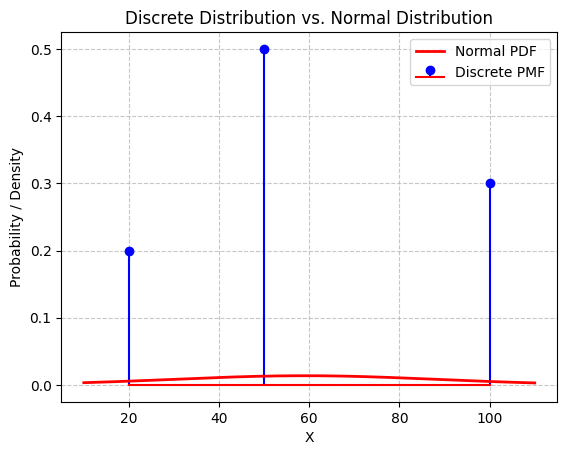

Ok that looks kinda bad, anyway.. 


In [41]:
from scipy.stats import norm

def central_moments(X, P):
    """Computes and prints the first four central moments for discrete X with probabilities P,
    and plots the discrete distribution with the matching normal distribution."""
    
    def E_X(X, P):
        return sum(x * p for x, p in zip(X, P))
    
    # Compute mean
    mu = E_X(X, P)
    
    # Compute variance and std deviation
    variance = sum(((x - mu) ** 2) * p for x, p in zip(X, P))
    sigma = np.sqrt(variance)
    
    # Compute skewness
    skewness = sum((((x - mu) / sigma) ** 3) * p for x, p in zip(X, P))
    
    # Compute kurtosis
    kurtosis = sum((((x - mu) / sigma) ** 4) * p for x, p in zip(X, P))
    
    # Print moments
    print(f"Moments from data:")
    print(f"Mean = {mu}")
    print(f"Sigma = {sqrt(variance)}")
    print(f"Skewness = {skewness}")
    print(f"Kurtosis = {kurtosis}")
    print(f"Normal distribution kurtosis = 3\n")

    # Prepare points for normal distribution curve
    x_vals = np.linspace(min(X) - 10, max(X) + 10, 300)
    
    # Plot discrete distribution probability mass (stem plot)
    plt.stem(X, P, linefmt='b-', markerfmt='bo', basefmt='r-', label='Discrete PMF') # PMF is used in the context of discrete random variables 
    
    # Plot normal distribution PDF curve
    normal_pdf = norm.pdf(x_vals, mu, sigma)
    plt.plot(x_vals, normal_pdf, 'r-', lw=2, label='Normal PDF')
    
    # Chart decorations
    plt.title('Discrete Distribution vs. Normal Distribution')
    plt.xlabel('X')
    plt.ylabel('Probability / Density')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.show()
    
# ----------------------- Main -----------------------------
central_moments(S,P)

print(f"Ok that looks kinda bad, anyway.. ")

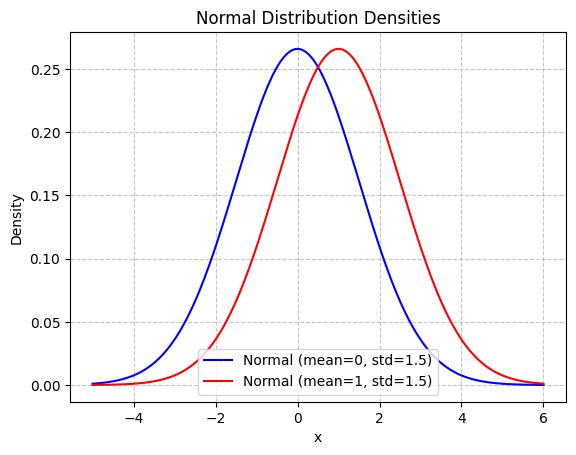

In [42]:
# Parameters
sigma = 1.5
mu_0 = 0
mu_1 = 1

# X-axis values
x = np.linspace(-5, 6, 400)

# Normal distributions
pdf_mu0 = norm.pdf(x, mu_0, sigma)
pdf_mu1 = norm.pdf(x, mu_1, sigma)

plt.plot(x, pdf_mu0, 'b-', label='Normal (mean=0, std=1.5)')
plt.plot(x, pdf_mu1, 'r-', label='Normal (mean=1, std=1.5)')

plt.title("Normal Distribution Densities")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Above is the effect of changeing means ceteris paribus in case of notm dist.

Now lets do the same, but both dist centers around a mean of 0.00, but we alter sigma from 
0.5 to 1.0

See that to an extent peakyness is a construct of x axis scale to stdev notional?

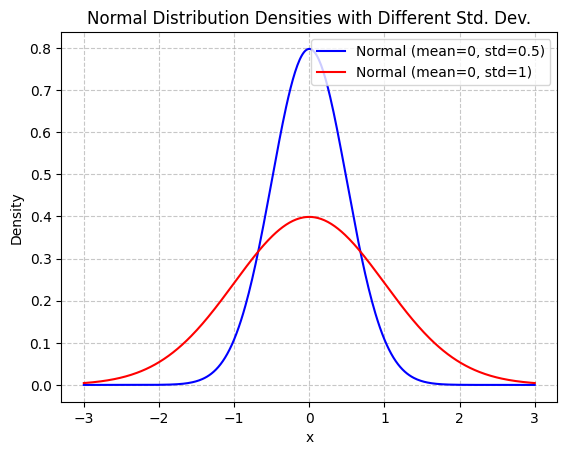

In [43]:
# Parameters
mu = 0
sigma_05 = 0.5
sigma_1 = 1

# X-axis values
x = np.linspace(-3, 3, 400)

# Normal distributions
pdf_sigma05 = norm.pdf(x, mu, sigma_05)
pdf_sigma1 = norm.pdf(x, mu, sigma_1)

plt.plot(x, pdf_sigma05, 'b-', label='Normal (mean=0, std=0.5)')
plt.plot(x, pdf_sigma1, 'r-', label='Normal (mean=0, std=1)')

plt.title("Normal Distribution Densities with Different Std. Dev.")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Moments and Linear Transformations

There are an array of situations in finance where it is convinient to rescale the data. For example, asset returns are commonly expressed as percentages for ease of interpretation. 

In [44]:
import yfinance as yf     # Yahoo Finance API handler package
import pandas as pd       # For dataframe to catch the basis data

# Download AAPL daily data for the last 20 calendar days
AAPL = yf.download('AAPL' # Passed ticker for example
                   , period='20d' # Lookback
                   , interval='1d',
                   auto_adjust=True # ... for dividents
                  )

# Get last 10 trading days close prices
last_10 = AAPL['Close'].tail(10)          # .tail method of the dataframe class or what

# Calculate daily percent returns
returns = last_10.pct_change().dropna()   # Calcs the % returns from Closing prices

# Calculate daily performance in dollar terms
basis_change = last_10.diff().dropna()    # Same but for ccy notional terms

print("AAPL daily percent returns (last 10 trading days):")
print(returns)
print("\nAAPL daily change in USD (basis terms, last 10 trading days):")
print(basis_change)


[*********************100%***********************]  1 of 1 completed

AAPL daily percent returns (last 10 trading days):
Ticker          AAPL
Date                
2025-09-30  0.000786
2025-10-01  0.003220
2025-10-02  0.006577
2025-10-03  0.003461
2025-10-06 -0.005155
2025-10-07 -0.000818
2025-10-08  0.006160
2025-10-09 -0.015578
2025-10-10 -0.034522

AAPL daily change in USD (basis terms, last 10 trading days):
Ticker          AAPL
Date                
2025-09-30  0.200012
2025-10-01  0.819992
2025-10-02  1.680008
2025-10-03  0.889984
2025-10-06 -1.329987
2025-10-07 -0.209991
2025-10-08  1.579987
2025-10-09 -4.020004
2025-10-10 -8.769989


Note that if I say that my AAPL stock yielded -7.56 USD, comparability across stocks and other assets scream for more info, since a -7.56 USD drop as shown for t=2025-09-10 screams for more context, since it's wildly different for a 10USD stock t-1; and a 300USD stock t-1. But if we transform the returns to a comparable % basis, for t=2025-09-10 we see -0.032 (-3.2%) which is easily comparable across assets without added context, like the t-1 notional. Mind you that it's beneficial to compare assets on the same currency basis, otherwise the expressed returns does not accont for the same FX exposure, thus EUR and USD expressed returns might lead to false consequences. 

Other example is the situation where the mean of the origianl series is substracted from every data point to achieve a variable with a mean of zeto. Both of these are examples of linear transformations.

In [45]:
# Calculate daily change in USD (basis terms)
basis_change = last_10.diff().dropna()   # From the "last_10" DF previously created

# Mean center (subtract mean from each value)
centered_basis_change = basis_change - basis_change.mean()

print("AAPL daily change in USD (basis terms, last 10 trading days):")
print(basis_change)
print("\nMean-centered basis change (mean = 0):")
print(centered_basis_change)
print("\nMean after centering:", centered_basis_change.mean())


AAPL daily change in USD (basis terms, last 10 trading days):
Ticker          AAPL
Date                
2025-09-30  0.200012
2025-10-01  0.819992
2025-10-02  1.680008
2025-10-03  0.889984
2025-10-06 -1.329987
2025-10-07 -0.209991
2025-10-08  1.579987
2025-10-09 -4.020004
2025-10-10 -8.769989

Mean-centered basis change (mean = 0):
Ticker          AAPL
Date                
2025-09-30  1.217789
2025-10-01  1.837769
2025-10-02  2.697784
2025-10-03  1.907761
2025-10-06 -0.312210
2025-10-07  0.807785
2025-10-08  2.597763
2025-10-09 -3.002228
2025-10-10 -7.752213

Mean after centering: Ticker
AAPL    0.0
dtype: float64


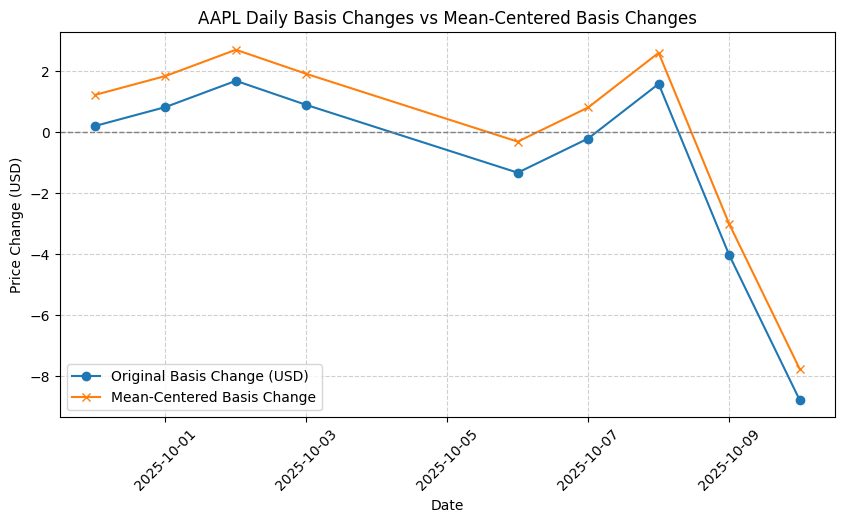

Since the mean is: Ticker
AAPL   -1.017776
dtype: float64, so near 0 in this instance it kinda fits overly well but anyway... I hope you see the point.
Mind you if the code is re-ran at different times since it does a present-20 day lookback result might change


In [46]:
# Visualization
plt.figure(figsize=(10, 5))
plt.plot(basis_change.index, basis_change.values, label='Original Basis Change (USD)', marker='o')
plt.plot(centered_basis_change.index, centered_basis_change.values, label='Mean-Centered Basis Change', marker='x')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('AAPL Daily Basis Changes vs Mean-Centered Basis Changes')
plt.xlabel('Date')
plt.ylabel('Price Change (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()

print(f"Since the mean is: {basis_change.mean()}, so near 0 in this instance it kinda fits overly well but anyway... I hope you see the point.")
print(f"Mind you if the code is re-ran at different times since it does a present-20 day lookback result might change")

Anyway so it's helpful to understand the effect of linear transformations on the first four moments of a random variable. As an example consider$$
Y = a + bX$$where $a$ and $b$ are both constant values. It is common to refer to $a$ as a "location shift", and $b$ as a "scale".

[*********************100%***********************]  1 of 1 completed


Moments before and after linear transformation Y = a + bX:
Original mean: 0.001843, transformed mean: 1.018433
Note that the transfromed mean is a + original mean, so 1.0 + 0.0018433 = 1.018433
Original variance: 0.00022159, transformed variance: 0.02215872
Similarly the transfromed variance is b^2 * origial variance, so 100 * 0.00022159 = 0.0221587
Original skewness: 0.596552, transformed skewness: 0.596552
Original kurtosis: 4.520499, transformed kurtosis: 4.520499
While both kurtosis and skewness remained unchanged, since they are kinda normailsed!!!


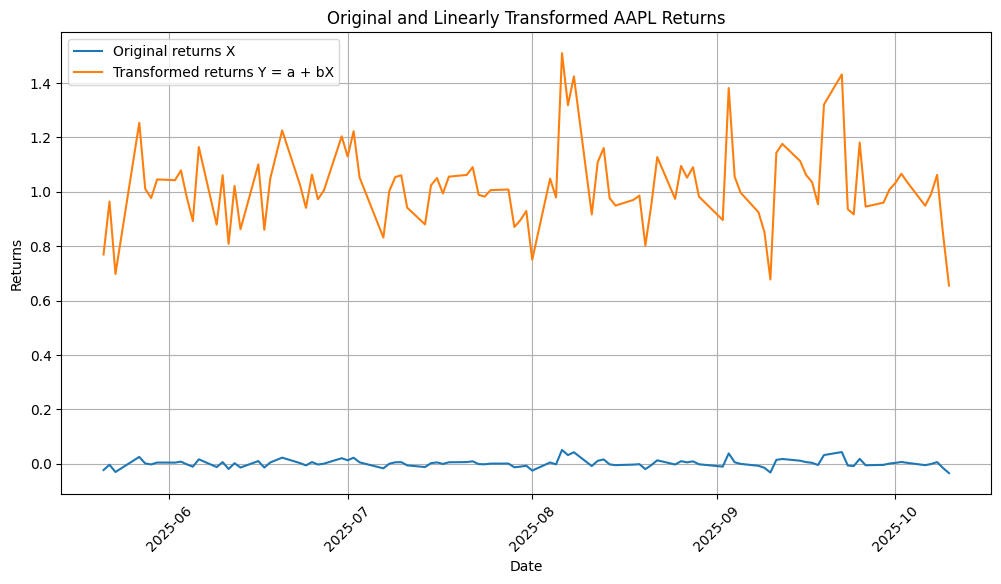

In [47]:
# Download AAPL daily data for the last 100 trading days (extra days for weekends)
AAPL = yf.download('AAPL', period='120d', interval='1d', auto_adjust=True)
last_100 = AAPL['Close'].tail(100)

# Compute daily simple returns
returns = last_100.pct_change().dropna()

# Define linear transformation parameters
a = 1.00  # location shift, note that it "relocates" the returns via +1.00 on the "Y" axis
b = 10   # scale factor, note that it ~ does a 10X zoom onto the returns persay

# Original returns
X = returns.values

# Apply linear transformation Y = a + b*X
Y = a + b * X    # Y = 1.00 + r * (Closing Price_t / Closing_Price_t-1 -1)

# Compute moments for original X
mu_X = np.mean(X)
var_X = np.var(X, ddof=0)
skew_X = np.mean(((X - mu_X) / np.sqrt(var_X)) ** 3)
kurt_X = np.mean(((X - mu_X) / np.sqrt(var_X)) ** 4)

# Compute moments for transformed Y
mu_Y = np.mean(Y)
var_Y = np.var(Y, ddof=0)
skew_Y = np.mean(((Y - mu_Y) / np.sqrt(var_Y)) ** 3)
kurt_Y = np.mean(((Y - mu_Y) / np.sqrt(var_Y)) ** 4)

# Print moments
print("Moments before and after linear transformation Y = a + bX:")
print(f"Original mean: {mu_X:.6f}, transformed mean: {mu_Y:.6f}")
print(f"Note that the transfromed mean is a + original mean, so {a} + {mu_X:.7f} = {mu_Y:.6f}")
print(f"Original variance: {var_X:.8f}, transformed variance: {var_Y:.8f}")
print(f"Similarly the transfromed variance is b^2 * origial variance, so {b**2} * {var_X:.8f} = {var_Y:.7f}")
print(f"Original skewness: {skew_X:.6f}, transformed skewness: {skew_Y:.6f}")
print(f"Original kurtosis: {kurt_X:.6f}, transformed kurtosis: {kurt_Y:.6f}")
print(f"While both kurtosis and skewness remained unchanged, since they are kinda normailsed!!!")

# Plot original and transformed returns
plt.figure(figsize=(12, 6))
plt.plot(returns.index, X, label='Original returns X')
plt.plot(returns.index, Y, label='Transformed returns Y = a + bX')
plt.title('Original and Linearly Transformed AAPL Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

So if we "translate" the explicit realised data to expectations we get from$$
Y = a + bX$$ to $$
E[Y] = a + bE[X]$$This follows directly from the linearity of the expectation operator. The variance of $Y$ is:$$variance(E[Y]) = b^2*variance(X)$$, or equivalently, $$\sigma^2 * b^2$$

Note that trough mean is affected by the location shift with $a$ as $\mu_Y = \mu_x + a$, the variance does not consider the relocation with $a$, it's concerned by the resizing with $b$, since it is a measure of distance to the mean.

Note that the standard deviation $\sigma$ is linear with $b$ while the variance $\sigma^2$ is quadratic with $b$.

Both skewness and kurtosis are unchanged by $a$ and $b$ cause they are standardized.

## Continous Random Variables

So basically via adding the complexity of continuity to the mix, we get a **continous** (I might have misspelled since my written english is kinda wack) random variablle opposing to a discrete one. Since the initial example can take 3 values for S, 20,50?, 100 it is random at nature, but the outcomes are discrete. But most uncertainty in nature are being actually continous, meaning that the outcomes and the corresponding probabilities are rather range bound, than finite outcome bound (except binaries like default or not; but even there the credit spread is rather continous, just the outcome is binary...).

For example, it is common to use continous random variables when modelling asset returns cause they can take any value up to the accuracy level of the asset price (e.g. dollars and cents). Usually most financial products are defined with a minimum tick size persay, so tough the outcomes it may close on, opposing to a trade entry, or a period opening price, the continous modelling is closer to reality than a quite finine discrete modelling, since at the minimum tick size the amount of values the price can actually take is converges to a point where continous modelling make more sense.

Many continous random variables such as yields and returns have a so called "support" for any value on the real number line (e.g.$\mathbb{R}$, so $x \in \mathbb{R}$), while others have a support for a defined interval on the real number line - for example the interval of $[0,1]$ for probabilities like the probability of rainfall tomorrow on an area.

I think math pros express this as: $x \in \mathbb{R}; x \in [0,1]$.

**Opposing to PMF, continous probs use a Continous Mass Function (CMF)**. The $PFD f(X)$ returns a non-negative value for any inpuit in the support of $X$. Note that a single value of $f(X)$ is technically not a probability cause the probability of any single value is always $0$ over a coninouts probability space, it's rather defined in mass terms opposing to definitive outcome likelyhood, it ain't coming from that hood. There are infinitely many $x$ in support of $X$, thus $Pr(x)$ converges to zero as we get from discrete probs towards indescrete (continous, ha-ha) probs.

Since actually in case of infinite many oucomes of a continous function of $f(X)$, if any $x$ would have a greater than 0 prob, the actual PMF would converge towards infinity, thus axioms of probability would be violated. 

To see how this works, consider:

- The interval of $[0, 1]$
- A 10-sided die with numbers ${0.05,0.15, ... ,0.95}$

Note that there is a $10%$ probability of getting any of the discrete results. Now suppoise the die has 1000 sides. Let's program!

In [48]:
# What we wanna, function defitnition
def side_dict_and_print(N, print_bool):
    sides = {}                          # Dictionary to hold side info
    interval = [0, 1]                   # Side value range bound
    p_sides = 1 / N                     # Assuming fair die, each side has equal probability
    # Fill dictionary with side names, probability, and values
    for side in range(1, N + 1):
        side_name = "side_" + str(side)
        value = (side - 0.5) / N  # To get midpoints / slices; alrernatively increment sizes: 0.05, 0.15, ..., 0.95
        sides[side_name] = {'probability': p_sides, 'value': value}
    
    # Compute and print the average probability of sides in the dict
    avg_prob = sum(side_info['probability'] for side_info in sides.values()) / len(sides)

    # Prints if print_bool = True is passed to the function
    if print_bool == True:
        print("Sides dictionary:")
        for name, info in sides.items():
            print(f"{name}: Probability = {info['probability']}, Value = {info['value']}")
        
        print(f"\nAverage probability of sides in dict: {avg_prob}")
    # Note that there isn't any return YX, I call these DOER functions, this DO fill a 
    # dict, and prints stuff, and doesn't return anything

# ========================= "Main" ========================
side_dict_and_print(N = 10,             # Initialize for n = 10
                    print_bool = True)
side_dict_and_print(N = 1000,           # Now for 1000
                    print_bool = False) # Set to "True" if you can't predict the outcome hehe

Sides dictionary:
side_1: Probability = 0.1, Value = 0.05
side_2: Probability = 0.1, Value = 0.15
side_3: Probability = 0.1, Value = 0.25
side_4: Probability = 0.1, Value = 0.35
side_5: Probability = 0.1, Value = 0.45
side_6: Probability = 0.1, Value = 0.55
side_7: Probability = 0.1, Value = 0.65
side_8: Probability = 0.1, Value = 0.75
side_9: Probability = 0.1, Value = 0.85
side_10: Probability = 0.1, Value = 0.95

Average probability of sides in dict: 0.1


So it's easy to see that any outcome $x$'s probability is convergeing towards $0.000...$ as we increase $N$ towards infinity.

An emergent requirement consequently as we leave discrete probability, and approach continous probability such as when the float variable memory allocation becomes inadequite.

$$
P(\text{side}_n) = \frac{1}{N}
$$

When

$$
N > 2 \times 10^{323}
$$

the representation of $$P(\text{side}_n)$$) as a standard 64-bit float becomes inadequate, since

$$
\frac{1}{N} < 5 \times 10^{-324}
$$

and will be rounded to zero due to floating-point underflow just like as we push the boundaries towards continous probability, $P(X)$ converges to $0.000...$.


In [49]:
# feeling_silly = False      # Don't
# if feeling_silly == True:
#    side_dict_and_print(N = 1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000,          
#                    print_bool = True)

# Rather
# P_N = 1 / 10**-325 # will return "ZeroDivisionError: float division by zero"
P_N = 1 / 10**323
P_N2 = 1 / 10**324
infinity = P_N = 1/10**-323
print(P_N) # "inf"
print(P_N2) # "inf
import sys
print(sys.float_info.min)      # Minimum positive normalized float
print(sys.float_info.epsilon)  # Difference between 1 and next representable float

inf
0.0
2.2250738585072014e-308
2.220446049250313e-16


Anyway, so it becomes imparative (is this a word?) to descirbe outcomes via probability mass function across 2 points! Recall that PMF is required to sum to $1$ across the support of $X$. This properity allso applies to PDF, except that the sum is replaced by an integral:$$
\int_{-\infty}^{\infty} f_x(x)\, dx = 1
$$

The PDF has a natuural graphical interpretation and the area under the PDF between $x_L$ and $x_U$ is the probability that $X$ will fall between this values, so $$Pr(x_L < X < x_U) = \int_{x_L}^{x_U} f_x(x)\, dx$$

In the book they push this quite further including relevations that PDF of norm dist has a scary formula, and that CDF doesn't have a closed form solution and so on, but I found digging deeper counterproductive, will return to expand on this if I ever feel the urge and added value (page 20-22 excluded).

## Questions
### **2.1 What is the key diff cross a discrete and a continous random variable.**


Discrete random variables have support on only a finite (or possibly countably infinite) set of points. Those points are all distinct in the sense that it there is always some number between any 2 points in the support. A continous random variable has support over a continous range of values. This range can be finite, as in uniform random variable $Uniform(a,b)$; or infinite, as the standard normal random variable whose support is the entire real line $(-\infty, \infty)$.

### **2.2 What do a PMF and a CDF measure? How are these related?**

The PMF measures the probability of a single value. The CDF measures the total probability that the random variable is less than or = to a specific value passed in as an input of the function -- that is the cummulative probability that $X <= x$ for some value of $x$. The Cummulative Density Function (CDF) is basically the sum of the Probability Mass Function (PMF) over the range of $(-\infty, x]$ where i denoted $x$ as the pass value up to the point we sum to basically.

### **2.3 What two properities a PMF must satisfy?**

(1) A PMF must be non-negative e.g.$P(X) >= 0.000$ for any $X$, and

(2) sum across the support of the random variable to 1.

### **2.4How are the mean, the variance, and standard deviation of $Y$ related to these moments of $X$ when $Y = a + bX$? In other words, calculate the mean, variance, and standard deviation of $Y$ as a function of the mean, variance, and standard deviation of $X$.**
------------------------------------------------------------ The mean -------------------------------------------------

$E[Y] = E[a + bX]$. Since additions, and multiplications with constants "pass over" the expectation operator [] freely, 

$E[Y] = a + E[bX]$ Geting $a$ out basically.

$E[Y] = a + bE[X]$ Geting $b$ out basically, arriveing at the conclusion that $E[Y] = a + bE[X]$.

------------------------------------------------------------ The Variance -------------------------------------------------

$V[Y] = V[a + bX] = V[bX] = b^2V[X]$

As the variance of a constant $a$ = 0 and the variance of $bX$ is $b^2$ times the variance of $X$; $V[X]$.

------------------------------------------------------------ The $\sigma$ -------------------------------------------------

$\sigma_y$ is basically the square root of the above variance expression, so $\sqrt{b^2V[X]} = |b| * \sqrt{V[X]}$


### 2.5 What is excess kurtosis?

Excess kustosis is the standard kurtosis measure of the distribution minus 3.00 which is the normal distribution's kurtosis. So basically excess kurtosis measures the kurtosis above the normal distribution's.

### 2.6 How are quantile functions related to the CDF? When $X$ is a continous random variable, when does this relationship not hold?

The quantile function is the inverse of the CDF function. That is, if $u = F_X(x)$ returns the CDF value of $X$, then $q = F_x^-1(u)$ is the quantile function. The CDF function is not inveritible if there are regions where there is no probability. Recall that in case of continous random variables for any value of x P(x) = 0.00? Generally speaking, the CDF function is not convertible if there are zero probability regions.

### 2.7 What are the median and the interquantile range? When is the median equal to the mean?

The median is the point where 50% of the probability is located on either side. It may not be unique or discrete distributions, altough it is common to choose the smallest value where the condition is satisfied. The IQR is the difference between the 75% and the 25% quantiles. These are the points where 25, and 75% of the probability of the random variable lies to the left. This difference is a measure of spread that is like the standard deviation. 


### 2.8 What is $E[XE[X]]$? Hint: recall that $E[X]$ is a constant?

$E[XE[X]] = sum(E[X]X Pr(X = x) = E[X]sum(X Pr(X=x)) = E[X] * E[X] = (E[X])^2$ because $E[X]$ is a constant and does not depend on X. In other words, the expected value of a random variable does not depend on the random variable.

Key idea is that for example a random process' expected value is 5. You "wrap" the random variable onto 5 repeats. Since $E[X]$ of the repeats is = 5 (constant), and the outcome's expected value is 5, we basically get $E[X]^2$.


### 2.9 Consider the following data on a discrete random variable $X$:

In [50]:
x = [-2.456, -3.388, -6.816, 1.531, 1.737, -1.254, -1.164, 1.532, 2.550, 0.296, -0.979, -4.259, 2.810, -1.608, -0.575]

# --- Mean ---
def mean_x(x_list):
    return sum(x_list) / len(x_list)

# --- Variance (Population) ---
def variance_x(x_list):
    mean_val = mean_x(x_list)
    return sum((xi - mean_val)**2 for xi in x_list) / len(x_list)

# --- Std. Dev (Population) ---
import math
def std_dev_x(x_list, mean_value=None):
    if mean_value is None:
        mean_value = mean_x(x_list)
    var_val = sum((xi - mean_value)**2 for xi in x_list) / len(x_list)
    return math.sqrt(var_val)

mean_val = mean_x(x)
var_val = variance_x(x)
sigma_val = std_dev_x(x, mean_val)

print(f"A: Mean: {mean_val:.3f} and Variance: {var_val:.3f}")


print("")
print("")
print("B")

# --- Standardize ---
def standardized_x(x_list):
    mean_val = mean_x(x_list)
    std_val = std_dev_x(x_list, mean_val)
    return [(xi - mean_val) / std_val for xi in x_list]

std_x = standardized_x(x)

for i, xi in enumerate(x):
    print(f"X_{i+1} = {xi:.3f}, E[X] = {mean_val:.3f}, σ_X = {sigma_val:.3f}, X_{i}(Standardized) = {std_x[i]:.3f}")
    print(f"As ({xi:.3f} - {mean_val:.3f}) / {sigma_val:.3f} = {std_x[i]:.3f}")

mean_std_x = mean_x(std_x)
std_dev_std_x = std_dev_x(std_x)

print(f"Mean of Standardized: {mean_std_x:.5f}")
print(f"Std Dev of Standardized: {std_dev_std_x:.3f}")

# --- Skewness and Kurtosis ---
def skew(x_list, mu=None, sigma=None):
    if mu is None: mu = mean_x(x_list)
    if sigma is None: sigma = std_dev_x(x_list, mu)
    n = len(x_list)
    return sum(((xi - mu) / sigma) ** 3 for xi in x_list) / n

def kurt(x_list, mu=None, sigma=None):
    if mu is None: mu = mean_x(x_list)
    if sigma is None: sigma = std_dev_x(x_list, mu)
    n = len(x_list)
    return sum(((xi - mu) / sigma) ** 4 for xi in x_list) / n

print("C")

def skewness_and_kurtosis_X_i(x_observations # list containing X_i
                 
              ):
    mean = mean_x(x_observations)
    sigma = std_dev_x(x_observations, mean_value=mean)
    skew_ans = [((x_observations[x_i] - mean) / sigma)**3 for x_i in range(len(x_observations))]
    kurt_ans = [((x_observations[x_i] - mean) / sigma)**4 for x_i in range(len(x_observations))]
    return skew_ans, kurt_ans
skew_X_i, kurt_X_i = skewness_and_kurtosis_X_i(x)

print("i - X_i -- X Standardized -- Skew -- Kurt")
for i in range(len(x)):
    print(f"{i+1} | {x[i]:.3f} | {std_x[i]:.3f} | {skew_X_i[i]:.3f} | {kurt_X_i[i]:.3f}")
print(f"Mean of skew_x_i is the skew of x:list containing observarions: {mean_x(skew_X_i):.3f}")
print(f"Mean of kurt_x_i is the kurt of x:list containing observarions: {mean_x(kurt_X_i):.3f}")

A: Mean: -0.803 and Variance: 6.762


B
X_1 = -2.456, E[X] = -0.803, σ_X = 2.600, X_0(Standardized) = -0.636
As (-2.456 - -0.803) / 2.600 = -0.636
X_2 = -3.388, E[X] = -0.803, σ_X = 2.600, X_1(Standardized) = -0.994
As (-3.388 - -0.803) / 2.600 = -0.994
X_3 = -6.816, E[X] = -0.803, σ_X = 2.600, X_2(Standardized) = -2.312
As (-6.816 - -0.803) / 2.600 = -2.312
X_4 = 1.531, E[X] = -0.803, σ_X = 2.600, X_3(Standardized) = 0.897
As (1.531 - -0.803) / 2.600 = 0.897
X_5 = 1.737, E[X] = -0.803, σ_X = 2.600, X_4(Standardized) = 0.977
As (1.737 - -0.803) / 2.600 = 0.977
X_6 = -1.254, E[X] = -0.803, σ_X = 2.600, X_5(Standardized) = -0.173
As (-1.254 - -0.803) / 2.600 = -0.173
X_7 = -1.164, E[X] = -0.803, σ_X = 2.600, X_6(Standardized) = -0.139
As (-1.164 - -0.803) / 2.600 = -0.139
X_8 = 1.532, E[X] = -0.803, σ_X = 2.600, X_7(Standardized) = 0.898
As (1.532 - -0.803) / 2.600 = 0.898
X_9 = 2.550, E[X] = -0.803, σ_X = 2.600, X_8(Standardized) = 1.289
As (2.550 - -0.803) / 2.600 = 1.289
X_10 = 0.296,

### 2.10 Suppose the return on an asset has the following distribution

In [51]:
rets: list =  [returns for returns in range (-4, 6)]
probs: list = [0.06, 0.09, 0.11, 0.12, 0.14, 0.16, 0.15, 0.08, 0.05, 0.04]
# Sanity check
print(rets) # Returns
print(f"Sum P_r = {sum(probs)}")

# A, Compute the mean, variance, and std deviation
# ok here the key stuff to realize is that for descriptive stats mean actually 
# assigns probs of 1/n to every observation, but if we wanna expand to discrete probs
# actually we must swap the 1/n to Pr_i of X_i 
def answer(rets, probs):
    indexation = range(len(rets))
    mean = 0.00
    for i in indexation:
        mean += rets[i] * probs[i] # E[X] basically
    var_x_i = [(rets[i] - mean)**2 for i in indexation]
    variance = 0.00
    for i in indexation:
        variance += var_x_i[i] * probs[i] # (X_i - mean)^2 * Pr(X_i)
    sigma = math.sqrt(variance)
    print("A")
    print(f"Mean / E[X] = {(mean):.3f}%")
    print(f"Variance[X] = {variance:.3f}%")
    print(f"Standard Deviation[X] = {sigma:.3f}%")
    print("B; Verify your result via alternative expression of variance, compute E[x^2] outright")
    ex2 = 0.0
    for i in indexation:
        ex2 += (rets[i] ** 2) * probs[i]
    print(f"E[X^2] = {ex2}")
    print("two variance calculations differ slightly because I haven't yet computed the alternative variance itself from E[X2]E[X2] and (E[X])2(E[X])2 for comparison.")
    print("printed E[X2]E[X2] but not Var(X)=E[X^2]−(E[X])^2 Var(X)=E[X2]−(E[X])2 explicitly.")
    print(f"Alternative Variance = E[X^2] - E[X] ^2 = {ex2 - mean**2}")
answer(rets, probs) # cast

[-4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
Sum P_r = 1.0
A
Mean / E[X] = 0.250%
Variance[X] = 5.547%
Standard Deviation[X] = 2.355%
B; Verify your result via alternative expression of variance, compute E[x^2] outright
E[X^2] = 5.61
two variance calculations differ slightly because I haven't yet computed the alternative variance itself from E[X2]E[X2] and (E[X])2(E[X])2 for comparison.
printed E[X2]E[X2] but not Var(X)=E[X^2]−(E[X])^2 Var(X)=E[X2]−(E[X])2 explicitly.
Alternative Variance = E[X^2] - E[X] ^2 = 5.5475


In [57]:
# C & D, Does this have exess kurtosis / and how the skewness is?

# -------------- Functions ---------------------------------
def mean_x(X, probabilities):
    return sum(x * p for x, p in zip(X, probabilities))

def variance_x(X, mu, probabilities):
    return sum(((x - mu) ** 2) * p for x, p in zip(X, probabilities))

def std_dev_x(variance):
    return math.sqrt(variance)

def skewness_x(X, mu, sigma, probabilities):
    skewness = 0.0
    for i in range(len(X)):
        skewness += (((X[i] - mu) / sigma) ** 3) * probabilities[i]
    return skewness


def kurtosis_x(X, mu, sigma, probabilities):
    kurtosis = 0.0
    for i in range(len(X)):
        kurtosis += (((X[i] - mu) / sigma) ** 4) * probabilities[i]
    return kurtosis

# ----------- Usage -------------
mu = mean_x(rets, probs)
variance = variance_x(rets, mu, probs)
sigma = std_dev_x(variance)
# Calculate kurtosis and excess kurtosis
kurt = kurtosis_x(rets, mu, sigma, probs)
excess_kurtosis = kurt - 3

# Calculate skewness
skewness_value = skewness_x(rets, mu, sigma, probs)
print(f"Skewness: {skewness_value:.3f}")

# Check for excess skewness (although excess kurtosis usually refers to kurtosis)
# In practice, skewness isn't described as having "excess", but you can check if it's significantly positive or negative.
threshold = 0.1
if abs(skewness_value) > threshold:  # Define threshold based on your context
    print("The distribution exhibits notable skewness.")
else:
    print("The distribution has minimal skewness.")


print(f"Kurtosis: {kurt:.3f}")
print(f"Excess Kurtosis: {excess_kurtosis:.3f}")
if excess_kurtosis >= 0:
    print("Yes, this distribution has excess kurtosis.")
else:
    print("No, this distribution does not have excess kurtosis.")

Skewness: 0.021
The distribution has minimal skewness.
Kurtosis: 2.242
Excess Kurtosis: -0.758
No, this distribution does not have excess kurtosis.


In [59]:
# D Median?
def pmf_median(values, probabilities):
    """Compute the median of a discrete random variable with associated probabilities."""
    # zip(values, probabilities) creates pairs (tuples) from the values list and probabilities list:
    # Example: If values = [-0.04, -0.03, ...], probabilities = [0.06, 0.09, ...]
    #   zip(values, probabilities) --> [(-0.04, 0.06), (-0.03, 0.09), ...]
    #
    # sorted(..., key=lambda x: x[0]) sorts these pairs in ascending order,
    #   using the first element of each tuple (that is, the outcome value) as the sort key.
    #   The 'lambda x: x[0]' is an inline, anonymous function that picks the 0th element (the value) of each pair for sorting.
    #
    # So, after this line, pmf is a list of (value, probability) pairs sorted in order of the value (smallest to largest).
    pmf = sorted(zip(values, probabilities), key=lambda x: x[0])
    cum_prob = 0.0
    for value, prob in pmf:
        cum_prob += prob
        if cum_prob >= 0.5:
            return value

# Usage
median = pmf_median(rets, probs)
print(f"Median: {median}%")


Median: 0%
